# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12,10

In [7]:
data = pd.read_excel ("geo.xlsx")

In [8]:
X = data[["x","y"]]

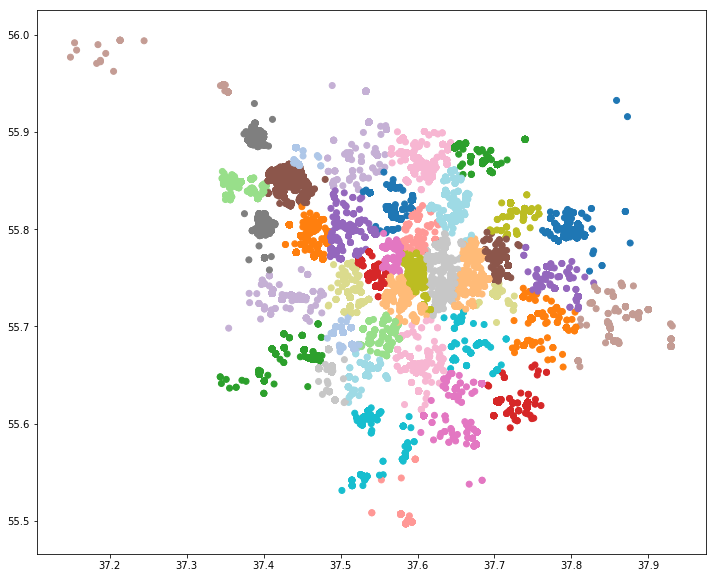

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=40, random_state=55)
clusters = kmeans.fit_predict(X)
plt.scatter (X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap = "tab20")
plt.show()

### Распределение голосов "за" и "против"


In [14]:
votes = data["comment_class"].unique()

In [15]:
# функция для заголовков графиков
def set_titles (x, n_clust):
    
    if x == -1:
        vote_type = "Против"
    else:
        vote_type = "За"
        
    return "{}\n Оптимальное число кластеров {:.2f}".format(vote_type, n_clust)

In [18]:
# функция определяет оптимальное число кластеров 
def opt_clusters (x, max_clust):
    
    k_inertia = []
    ks = range(1,max_clust)

    for k in ks:
        clf_kmeans = KMeans(n_clusters=k)
        clusters_kmeans = clf_kmeans.fit_predict(x, )
        k_inertia.append(clf_kmeans.inertia_)
    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]
    k_optim = ks[np.argmin(diff_r)+1]
    
    return k_optim

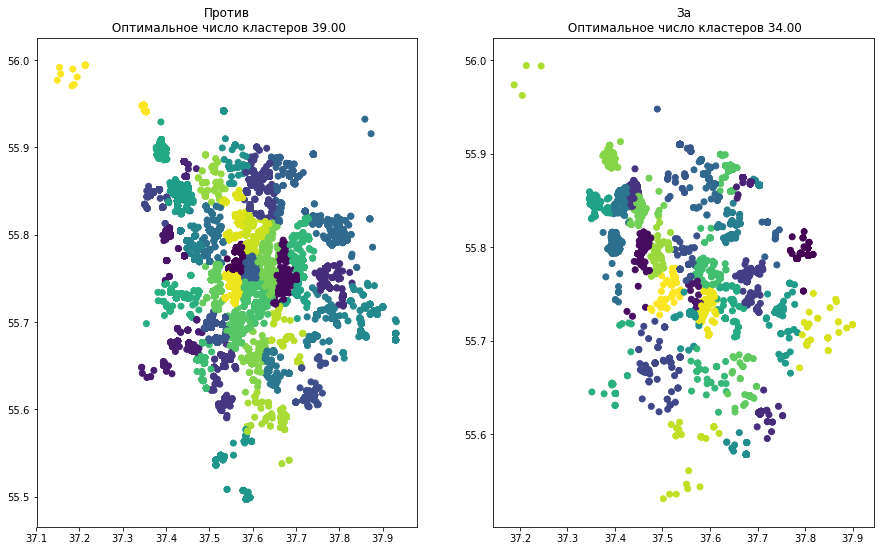

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 9))

for ax, vote in zip (axes, votes):
    
    X_vote = data [data["comment_class"] == vote][["x","y"]]
    opt = opt_clusters(X_vote, 50) # оптимальное число кластеров
    kmeans = KMeans(n_clusters = opt)
    clusters = kmeans.fit_predict(X_vote)
    ax.scatter (X_vote.iloc[:, 0], X_vote.iloc[:, 1], c=clusters)
    ax.set_title(set_titles (vote, opt))

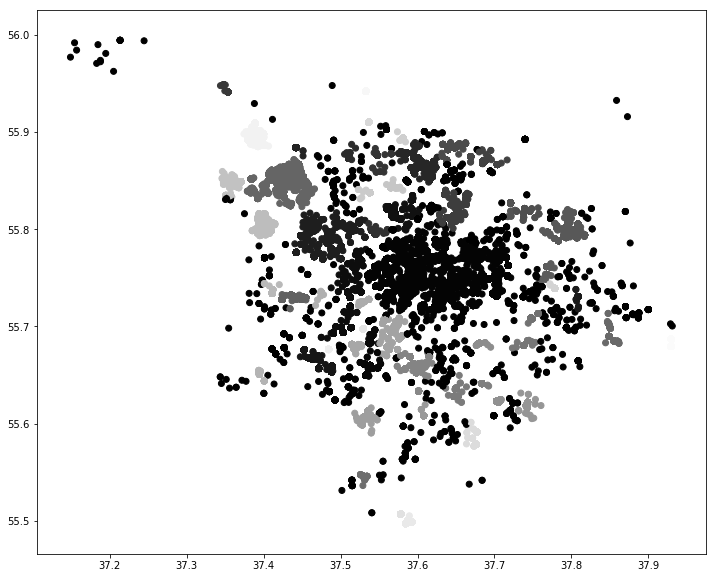

In [38]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.01, min_samples=50) 
clusters = dbscan.fit_predict(X)

plt.scatter (X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='gray')
plt.show()